In [1]:
import pandas
import numpy as np
df = pandas.read_csv('d.csv', index_col=0)
df.drop(df.index[380])

ndf = np.ones((df.shape[0],df.shape[1]+1)).astype(np.float32)
for i in range(1, ndf.shape[1]):
    ndf[:,i] = ndf[:,i-1] * (df[str(i-1)] +1)

In [2]:
data = []
INIT_BOARD = np.array([1., 1.1013038, 1.1794043, 1.1631792, 1.3270822,
                       1.4308366, 1.3914282, 1.3369217, 1.4687662, 1.2522621,
                       1.399323, 1.5486878, 1.5262247, 1.4169103, 1.7958373,
                       1.958909, 2.0691543, 2.4639494, 1.7616072, 1.1931757,
                       1.471186, 1.6879116, 1.3622735, 1.8395222, 1.6322048,
                       0.86365503, 0.90777415, 0.7899267, 0.8909756, 1.0667678,
                       0.8418497])

for i in range(100000):
    choice = np.random.choice(ndf.shape[0], 9)
    s = ndf[choice].sum(axis=0) + INIT_BOARD
    s = s/s[0]
    x = np.arange(ndf.shape[1])
    (a,b) = np.polyfit(x, s, 1)
    y = x * a + b
    mse = ((y - s) ** 2).sum() / ndf.shape[1]
    data.append(mse)
    
pandas.DataFrame(data).hist(bins=1000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5CB53630>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F51D80128>]],
      dtype=object)

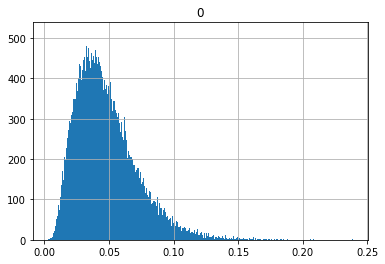

In [3]:
pandas.DataFrame(data).hist(bins=1000)

In [61]:
np.array(df.index)[[723 ,480, 123, 816, 241 , 55 ,360 ,414,  80 ,887]]

array(['Realogy Holdings', '金矿指数三倍做空ETF', '债券指数ETF-Vanguard美国', '莫库酒业',
       '三倍做空天然气ETN(VelocityShares)', 'JPMorgan Alerian MLP ETN',
       'First Republic Bank San Francisc', 'H&R Block Inc', '雅典娜',
       'Velocitysharestm 3X Long Silver'], dtype=object)